In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_root = pd.read_csv("Dry_Beans_Dataset.csv")

In [3]:
df_root.head()

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,NaN,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df_root.describe()

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13609.000000,13608.000000,13610.000000,13609.000000,13611.000000,13611.000000,13611.000000,13608.000000,13611.000000,13607.000000,13607.000000,13609.000000,13611.000000,13611.000000
mean,6806.000000,53048.284549,855.283459,320.155372,202.273996,1.583268,0.750930,53768.200206,253.064220,0.749733,0.987142,0.873282,0.799830,0.006564,0.001716,0.643590,0.995063
std,3929.301592,29324.095717,214.289696,85.693199,44.974478,0.246669,0.091962,29774.915817,59.177120,0.049086,0.004661,0.059520,0.061691,0.001128,0.000596,0.098996,0.004366
min,1.000000,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,3403.500000,36328.000000,703.523500,253.319280,175.840519,1.432352,0.715953,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762444,0.005900,0.001153,0.581359,0.993703
50%,6806.000000,44652.000000,794.941000,296.899313,192.443880,1.551132,0.764446,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801227,0.006645,0.001694,0.642044,0.996386
75%,10208.500000,61332.000000,977.213000,376.497678,217.036082,1.707118,0.810471,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834234,0.007272,0.002170,0.696006,0.997883
max,13611.000000,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
df_root.dtypes

Bean ID              int64
Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [6]:
df_missing = df_root.copy()
set(df_missing.Class)

{'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'}

In [7]:
df_missing.isna().sum()

Bean ID            0
Area               0
Perimeter          0
MajorAxisLength    2
MinorAxisLength    3
AspectRation       1
Eccentricity       2
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           3
roundness          0
Compactness        4
ShapeFactor1       4
ShapeFactor2       2
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
df_missing = df_missing.dropna()

In [10]:
df_missing.isna().sum()

Bean ID            0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [11]:
df_missing.shape

(13591, 18)

In [12]:
df_missing.describe()


,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000,13591.000000
mean,6815.816055,53077.569421,855.565981,320.281091,202.292563,1.583801,0.751189,53797.983298,253.134391,0.749698,0.987141,0.873174,0.799700,0.006563,0.001714,0.643315,0.995059
std,3923.841928,29335.656114,214.319365,85.679586,44.999344,0.246422,0.091731,29786.623118,59.192047,0.049109,0.004662,0.059491,0.061607,0.001129,0.000595,0.098800,0.004368
min,1.000000,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,3418.500000,36373.000000,703.897000,253.441135,175.792208,1.432988,0.716251,36750.000000,215.201166,0.718527,0.985669,0.832015,0.762366,0.005898,0.001153,0.581202,0.993695
50%,6816.000000,44674.000000,795.194000,297.079966,192.476741,1.551509,0.764576,45224.000000,238.496758,0.759785,0.988282,0.883061,0.801138,0.006644,0.001692,0.641822,0.996381
75%,10213.500000,61352.000000,977.360500,376.520088,217.124066,1.707447,0.810550,62326.500000,279.492026,0.786858,0.990011,0.916797,0.834010,0.007273,0.002168,0.695572,0.997877
max,13611.000000,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [13]:
df_root.describe()

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13609.000000,13608.000000,13610.000000,13609.000000,13611.000000,13611.000000,13611.000000,13608.000000,13611.000000,13607.000000,13607.000000,13609.000000,13611.000000,13611.000000
mean,6806.000000,53048.284549,855.283459,320.155372,202.273996,1.583268,0.750930,53768.200206,253.064220,0.749733,0.987142,0.873282,0.799830,0.006564,0.001716,0.643590,0.995063
std,3929.301592,29324.095717,214.289696,85.693199,44.974478,0.246669,0.091962,29774.915817,59.177120,0.049086,0.004661,0.059520,0.061691,0.001128,0.000596,0.098996,0.004366
min,1.000000,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,3403.500000,36328.000000,703.523500,253.319280,175.840519,1.432352,0.715953,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762444,0.005900,0.001153,0.581359,0.993703
50%,6806.000000,44652.000000,794.941000,296.899313,192.443880,1.551132,0.764446,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801227,0.006645,0.001694,0.642044,0.996386
75%,10208.500000,61332.000000,977.213000,376.497678,217.036082,1.707118,0.810471,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834234,0.007272,0.002170,0.696006,0.997883
max,13611.000000,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


<AxesSubplot:>

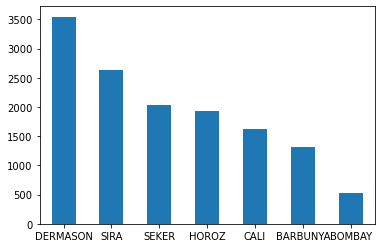

In [128]:
count_class = pd.value_counts(df_root["Class"],sort = True)
count_class.plot(kind='bar',rot = 0)

In [129]:

df_root[df_root.duplicated()]

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class


In [14]:
x = df_missing.drop(columns=['Class'])

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
def vif_score(x):
    scalar = StandardScaler()
    arr = scalar.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns = ["Features","VIF_Score"])

In [16]:
vif_score(x)

,Features,VIF_Score
0,Bean ID,3.456400
1,Area,84374.351623
2,Perimeter,3609.069187
3,MajorAxisLength,93582.503475
4,MinorAxisLength,82742.241955
5,AspectRation,14321.867608
6,Eccentricity,1308.370385
7,ConvexArea,80962.175318
8,EquivDiameter,339058.184153
9,Extent,1.243752


In [17]:
df_missing.corr()

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Bean ID,1.000000,-0.371887,-0.414544,-0.328433,-0.504688,0.136148,0.304513,-0.372233,-0.421729,-0.098965,0.088195,0.119424,-0.197483,0.604464,0.079431,-0.220085,0.060102
Area,-0.371887,1.000000,0.966727,0.931885,0.951674,0.240697,0.266357,0.999939,0.984968,0.054859,-0.196447,-0.356850,-0.266999,-0.848064,-0.639429,-0.271069,-0.355275
Perimeter,-0.414544,0.966727,1.000000,0.977338,0.913360,0.384142,0.389826,0.967695,0.991378,-0.020541,-0.303870,-0.546987,-0.405696,-0.864885,-0.767708,-0.407265,-0.428790
MajorAxisLength,-0.328433,0.931885,0.977338,1.000000,0.826331,0.549278,0.540849,0.932658,0.961747,-0.077374,-0.284211,-0.595607,-0.567315,-0.773989,-0.859321,-0.567120,-0.481988
MinorAxisLength,-0.504688,0.951674,0.913360,0.826331,1.000000,-0.009921,0.018604,0.951412,0.948680,0.146247,-0.155778,-0.210016,-0.014235,-0.947208,-0.471846,-0.018470,-0.263549
AspectRation,0.136148,0.240697,0.384142,0.549278,-0.009921,1.000000,0.924254,0.242265,0.302490,-0.369861,-0.267681,-0.766460,-0.987695,0.025118,-0.837239,-0.978601,-0.448581
Eccentricity,0.304513,0.266357,0.389826,0.540849,0.018604,0.924254,1.000000,0.268135,0.317372,-0.319112,-0.297903,-0.721801,-0.970268,0.020665,-0.859248,-0.981022,-0.448822
ConvexArea,-0.372233,0.999939,0.967695,0.932658,0.951412,0.242265,0.268135,1.000000,0.985226,0.053078,-0.206057,-0.361406,-0.268857,-0.848056,-0.641003,-0.272951,-0.361606
EquivDiameter,-0.421729,0.984968,0.991378,0.961747,0.948680,0.302490,0.317372,0.985226,1.000000,0.028975,-0.231521,-0.435215,-0.326449,-0.892947,-0.713171,-0.329175,-0.392015
Extent,-0.098965,0.054859,-0.020541,-0.077374,0.146247,-0.369861,-0.319112,0.053078,0.028975,1.000000,0.191235,0.344032,0.353918,-0.141821,0.237344,0.347342,0.148097


In [18]:
df_corr = df_missing.copy()
dict_Class = {k:v for k, v in zip(list(set(df_corr.iloc[:, -1].tolist())),
                                     list(range(len(list(set(df_corr.iloc[:, -1].tolist()))))))}

In [19]:
dict_Class


{'SIRA': 0,
 'HOROZ': 1,
 'DERMASON': 2,
 'SEKER': 3,
 'CALI': 4,
 'BOMBAY': 5,
 'BARBUNYA': 6}

In [20]:
df_corr

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,6,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13607,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,13608,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,13609,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,13610,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [21]:
df_corr["Class"] = df_corr["Class"].map(dict_Class)

In [22]:
df_corr

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,3
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,3
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,3
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,3
5,6,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13607,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,2
13607,13608,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,2
13608,13609,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,2
13609,13610,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,2


In [23]:
set(df_corr["Class"])

{0, 1, 2, 3, 4, 5, 6}

array([[<AxesSubplot:title={'center':'Bean ID'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>],
       [<AxesSubplot:title={'center':'MinorAxisLength'}>,
        <AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>],
       [<AxesSubplot:title={'center':'EquivDiameter'}>,
        <AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>],
       [<AxesSubplot:title={'center':'Compactness'}>,
        <AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>],
       [<AxesSubplot:title={'center':'ShapeFactor4'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>,
        <AxesSubplot:>

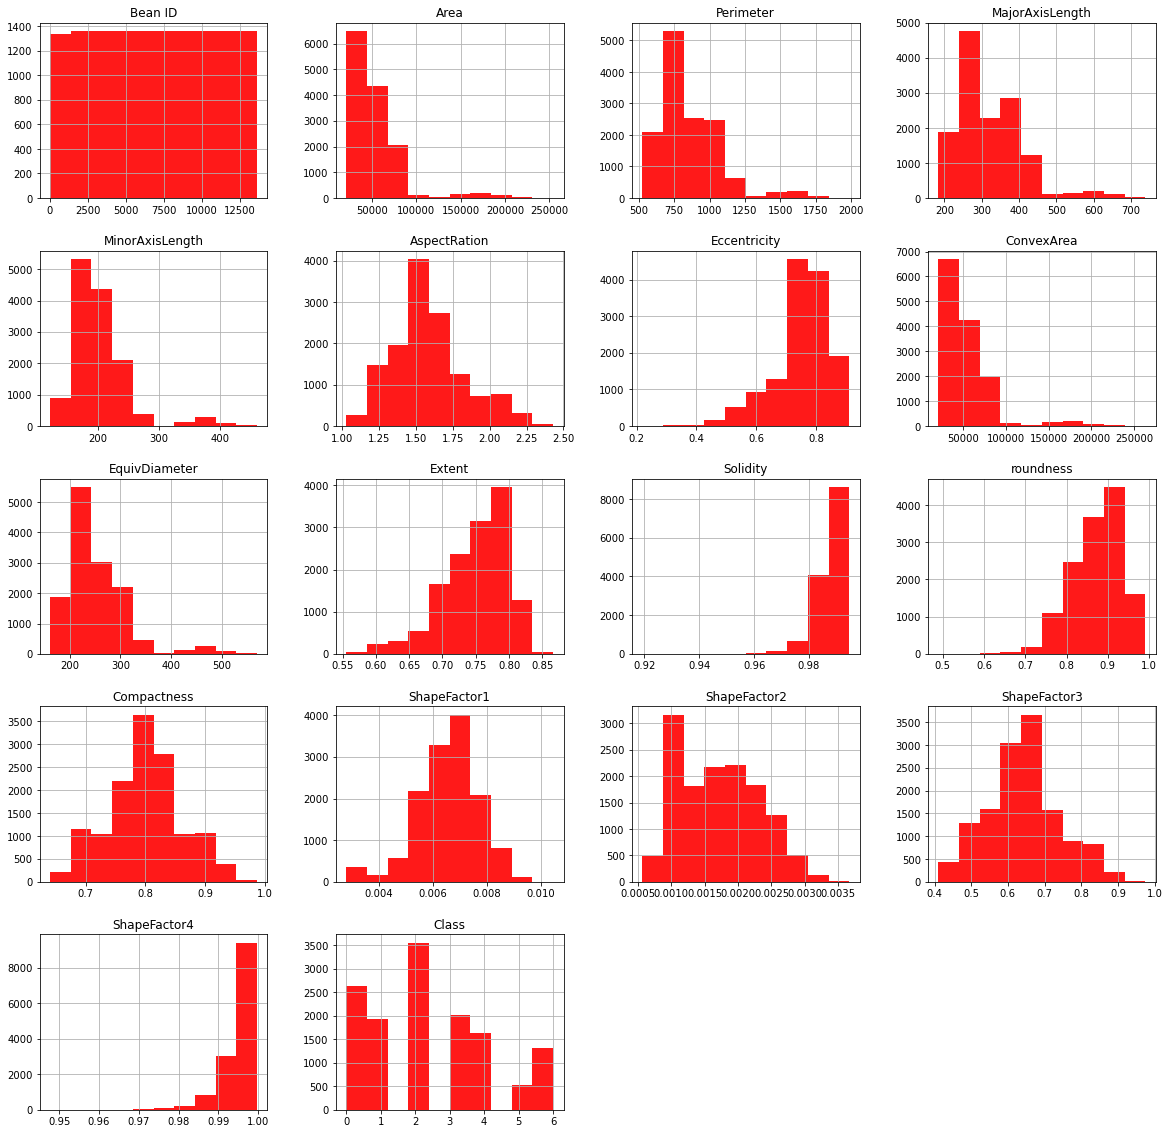

In [24]:
df_corr.hist(figsize= (20,20) , color = 'r' , alpha  = .9)

In [ ]:
df_corr

In [ ]:
X = df_corr.drop(columns=["Class","Bean ID"])
y = df_corr.Class

Index(['Bean ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

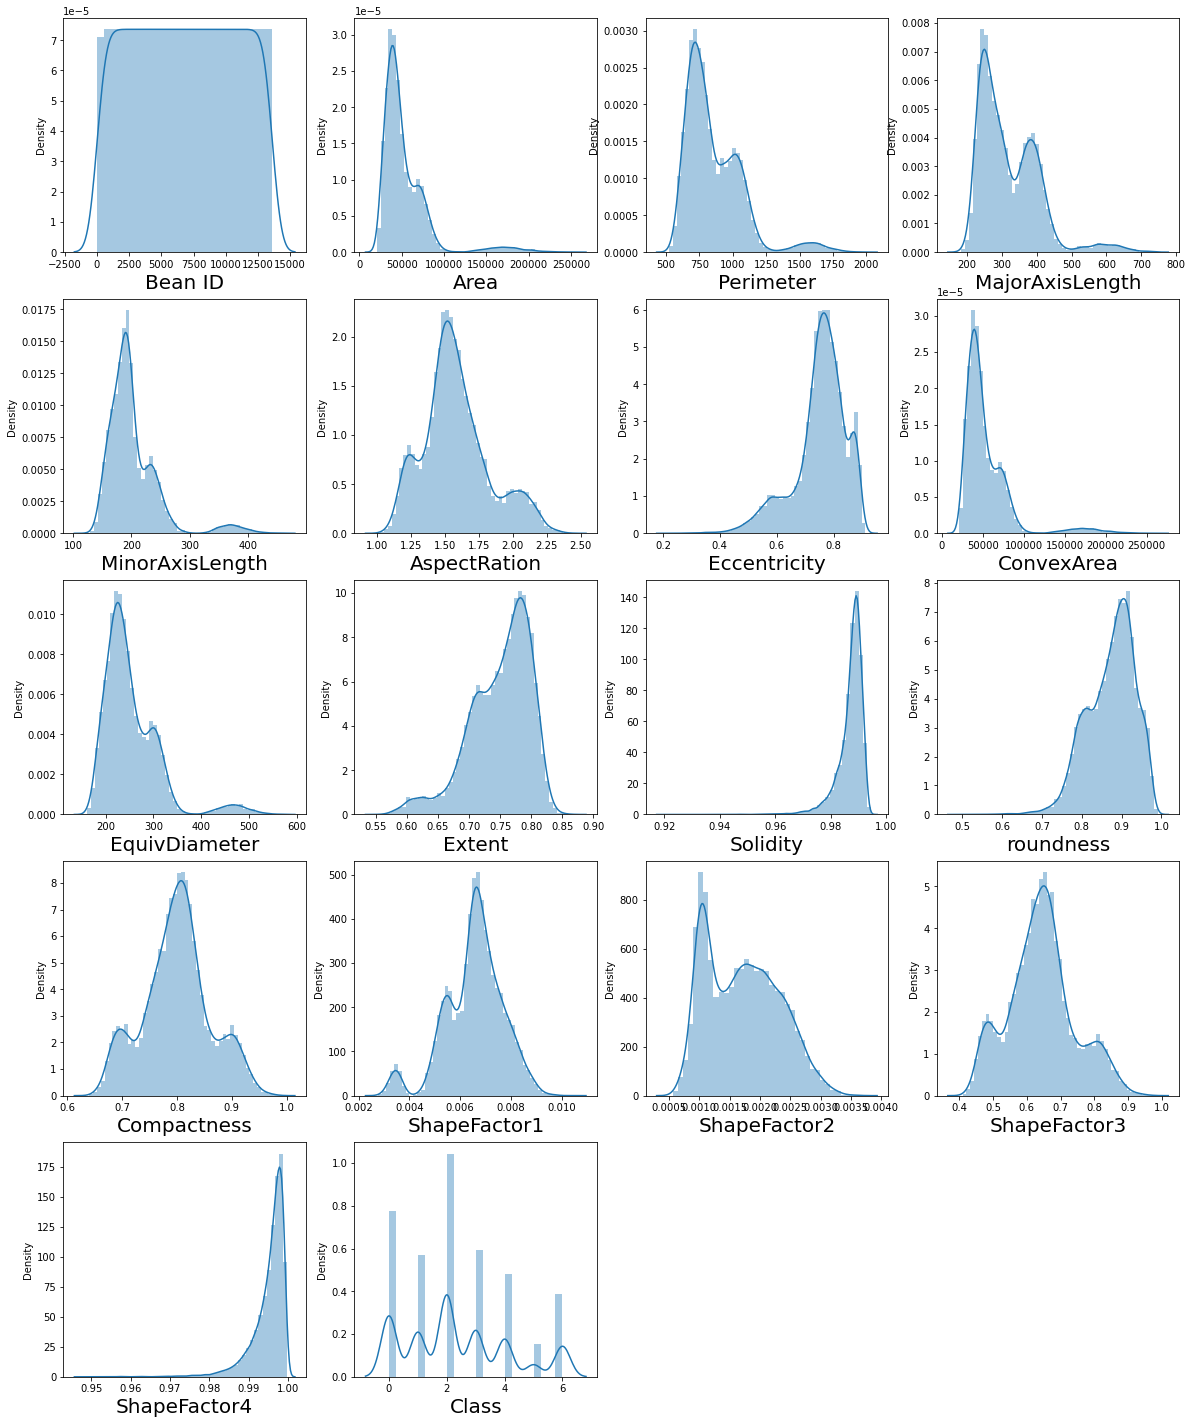

In [25]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
print(df_corr.columns)
for column in df_corr.columns:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_corr[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:

fig, ax = plt.subplots(figsize=(40,40))
sns.boxplot(data=df_corr, width= 0.5,ax=ax,  fliersize=3)

In [ ]:
for column in df_corr:
    plt.figure()
    df_corr.boxplot([column])

In [ ]:
'''q = df_corr['Area'].quantile(0.93)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = df_corr[df_corr['Area']<q]

q = data_cleaned['MinorAxisLength'].quantile(0.978)
#p  = data_cleaned['MinorAxisLength'].quantile(0.00)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[(data_cleaned['MinorAxisLength']>p) & (data_cleaned['MinorAxisLength']<q)]

data_cleaned.boxplot(['MinorAxisLength'])'''

In [26]:
df_corr

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,3
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,3
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,3
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,3
5,6,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,13607,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,2
13607,13608,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,2
13608,13609,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,2
13609,13610,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,2


In [57]:
df_outlier = df_corr.copy()
df_outlier.drop(columns = ["Class","Bean ID"],inplace=True)
df_outlier.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [32]:
df_outlier

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [35]:
Q1 = df_outlier.quantile(0.25)
Q3 = df_outlier.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Area               24979.000000
Perimeter            273.463500
MajorAxisLength      123.078953
MinorAxisLength       41.331858
AspectRation           0.274459
Eccentricity           0.094299
ConvexArea         25576.500000
EquivDiameter         64.290860
Extent                 0.068331
Solidity               0.004342
roundness              0.084782
Compactness            0.071644
ShapeFactor1           0.001374
ShapeFactor2           0.001015
ShapeFactor3           0.114370
ShapeFactor4           0.004182
dtype: float64


In [43]:
#print(df_outlier < (Q1 - 1.5 * IQR)) | (df_outlier > (Q3 + 1.5 * IQR))

#Skewness|

In [53]:
for col in df_outlier:
    print(df_outlier[col].skew())
    #df['Income'].describe()

2.951255591634598
1.6249749765014962
1.357668268523544
2.2357427157936804
0.5840957384901392
-1.0656828186476266
2.9401487885739988
1.9475874509888866
-0.8937382041693148
-2.5501567504367912
-0.6356652140480243
0.03596081606550084
-0.5328984958350058
0.29964487288934977
0.24173496281589082
-2.758829845636853


In [163]:
df_outlier = df_corr.copy()

In [164]:
for column in df_outlier.columns:
    lower = df_outlier[column].quantile(0.20)
    upper = df_outlier[column].quantile(0.80)
    median = df_outlier[column].quantile(0.50)
    df_outlier[column] = np.where(df_outlier[column] <lower, lower,df_outlier[column])
    df_outlier[column] = np.where(df_outlier[column] >upper, lower,df_outlier[column])
    print(column, "->", df_outlier[column].skew())


Bean ID -> 0.6579338748182176
Area -> 1.1809923300564587
Perimeter -> 1.0952113445593368
MajorAxisLength -> 1.0270699839176543
MinorAxisLength -> 0.9225159502997904
AspectRation -> 0.7396820972726426
Eccentricity -> 0.48418496920659154
ConvexArea -> 1.1898407503399242
EquivDiameter -> 1.0506173413757434
Extent -> 0.457352926745696
Solidity -> 0.33058778211770823
roundness -> 0.40189005579052595
Compactness -> 0.5007470852357254
ShapeFactor1 -> 0.40457723095659637
ShapeFactor2 -> 0.658500900378327
ShapeFactor3 -> 0.532248215816236
ShapeFactor4 -> 0.3037706179402455
Class -> 0.7987905266453434


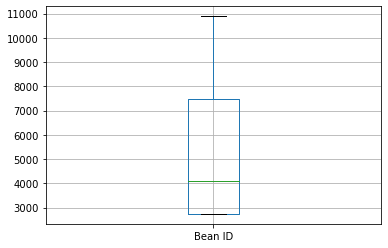

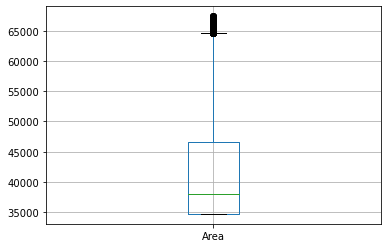

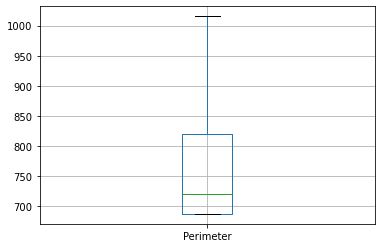

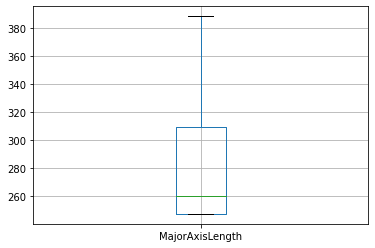

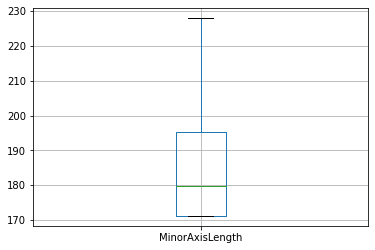

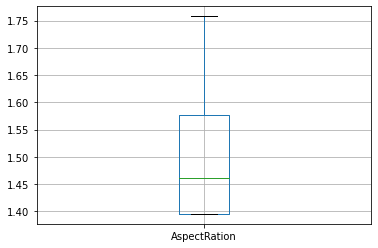

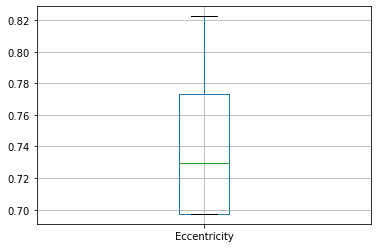

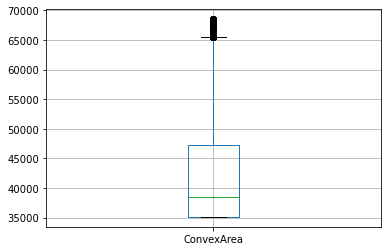

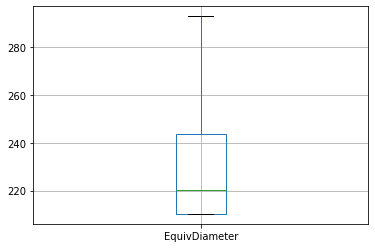

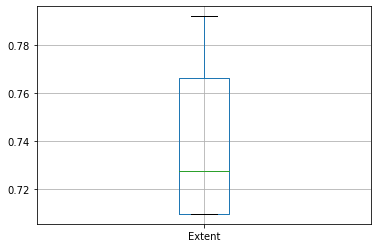

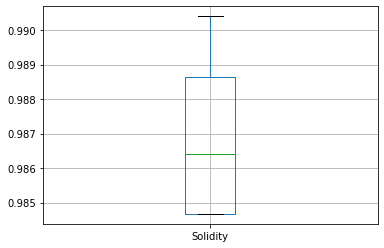

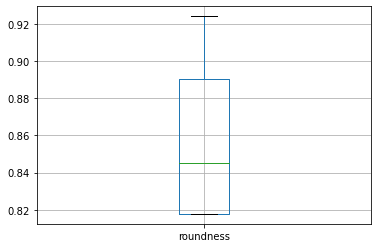

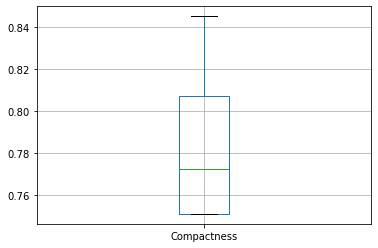

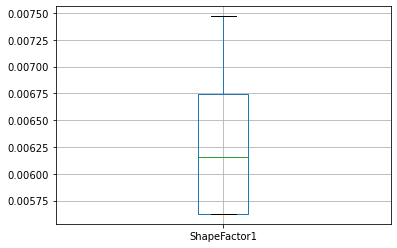

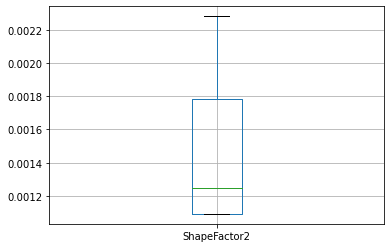

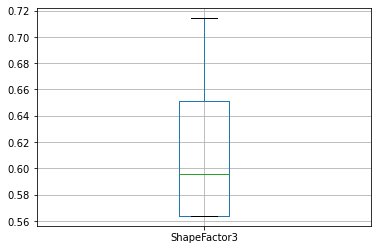

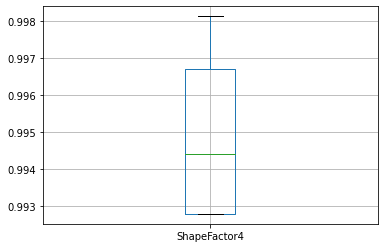

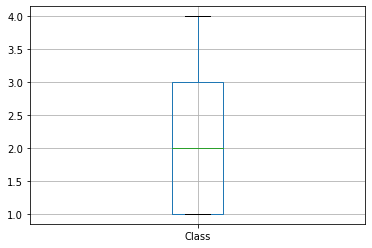

In [165]:
for column in df_outlier:
    plt.figure()
    df_outlier.boxplot([column])

Index(['Bean ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

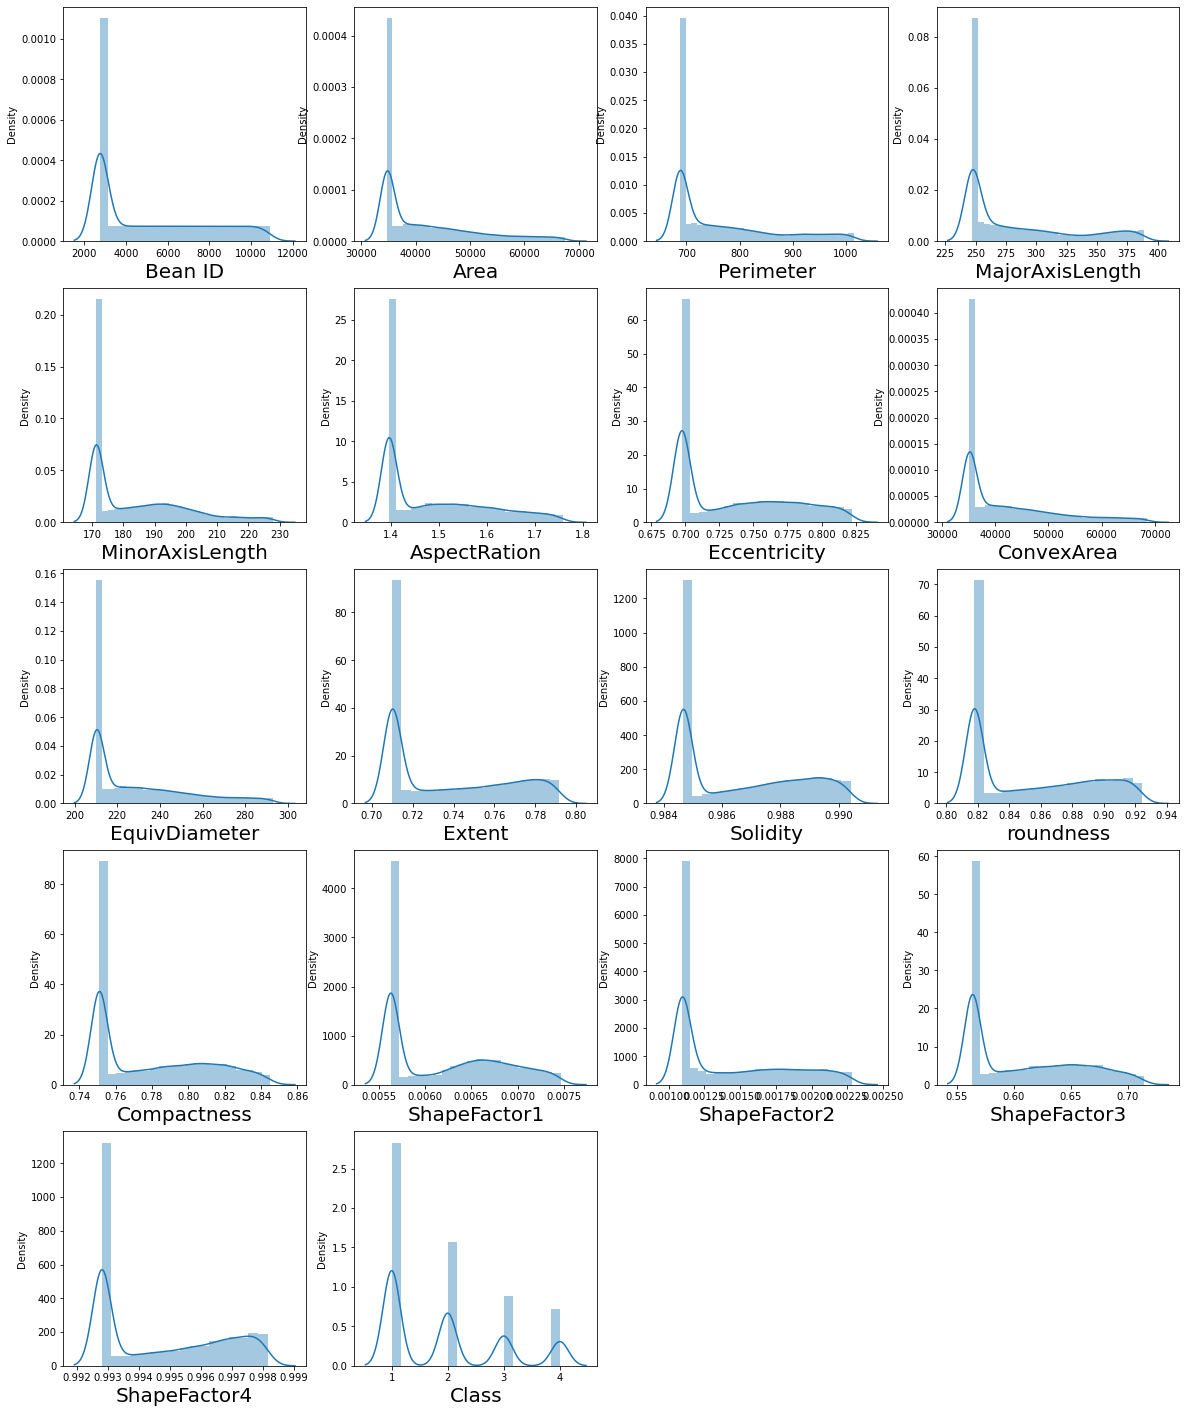

In [166]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
print(df_corr.columns)
for column in df_outlier.columns:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_outlier[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [167]:
df_normalize = df_outlier.copy()
df_normalize.drop(columns= ["Class","Bean ID"],inplace=True)
df_normalize

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,34715.0,687.345,247.096035,173.888747,1.395186,0.697330,35103.0,210.239175,0.763923,0.988856,0.817811,0.750867,0.007332,0.001091,0.563802,0.992792
1,34715.0,687.345,247.096035,182.734419,1.395186,0.697330,35103.0,210.239175,0.783968,0.984986,0.887034,0.750867,0.006979,0.001091,0.563802,0.992792
2,34715.0,687.345,247.096035,175.931143,1.395186,0.697330,35103.0,210.239175,0.778113,0.989559,0.817811,0.750867,0.007244,0.001091,0.563802,0.992792
4,34715.0,687.345,247.096035,190.279279,1.395186,0.697330,35103.0,210.239175,0.773098,0.984672,0.817811,0.750867,0.006697,0.001091,0.563802,0.992792
5,34715.0,687.345,247.096035,181.510182,1.395186,0.697330,35103.0,210.239175,0.775688,0.989510,0.817811,0.750867,0.007020,0.001091,0.563802,0.992792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.992792
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.709858,0.984672,0.922015,0.822252,0.006688,0.001886,0.676099,0.992792
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653247,0.709858,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [168]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
col = df_normalize.columns
dt = scaler.fit_transform(df_normalize)
df_scaled = pd.DataFrame(dt,columns=col)


In [169]:
df_scaled

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.000000,0.000000,0.000000,0.047013,0.000000,0.000000,0.000000,0.000000,0.658867,0.730276,0.000000,0.000000,0.924897,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.202924,0.000000,0.000000,0.000000,0.000000,0.903158,0.054736,0.651322,0.000000,0.733681,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.083011,0.000000,0.000000,0.000000,0.000000,0.831806,0.852938,0.000000,0.000000,0.877428,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.335908,0.000000,0.000000,0.000000,0.000000,0.770687,0.000000,0.000000,0.000000,0.581049,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.181346,0.000000,0.000000,0.000000,0.000000,0.802256,0.844391,0.000000,0.000000,0.756120,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13586,0.225804,0.220436,0.293899,0.259508,0.434299,0.540893,0.221727,0.257212,0.057474,0.987763,0.929545,0.541454,0.668556,0.552670,0.526801,0.000000
13587,0.225927,0.213743,0.243450,0.343555,0.223992,0.306703,0.221307,0.257345,0.000000,0.000000,0.980469,0.757908,0.576229,0.667592,0.747079,0.000000
13588,0.227089,0.219294,0.243192,0.351924,0.213358,0.293615,0.223553,0.258607,0.244640,0.912278,0.946679,0.762978,0.572492,0.669639,0.752305,0.743168
13589,0.227334,0.232876,0.256203,0.335845,0.259518,0.349485,0.226487,0.258873,0.000000,0.548160,0.847717,0.707001,0.595498,0.639177,0.694776,0.454358


Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

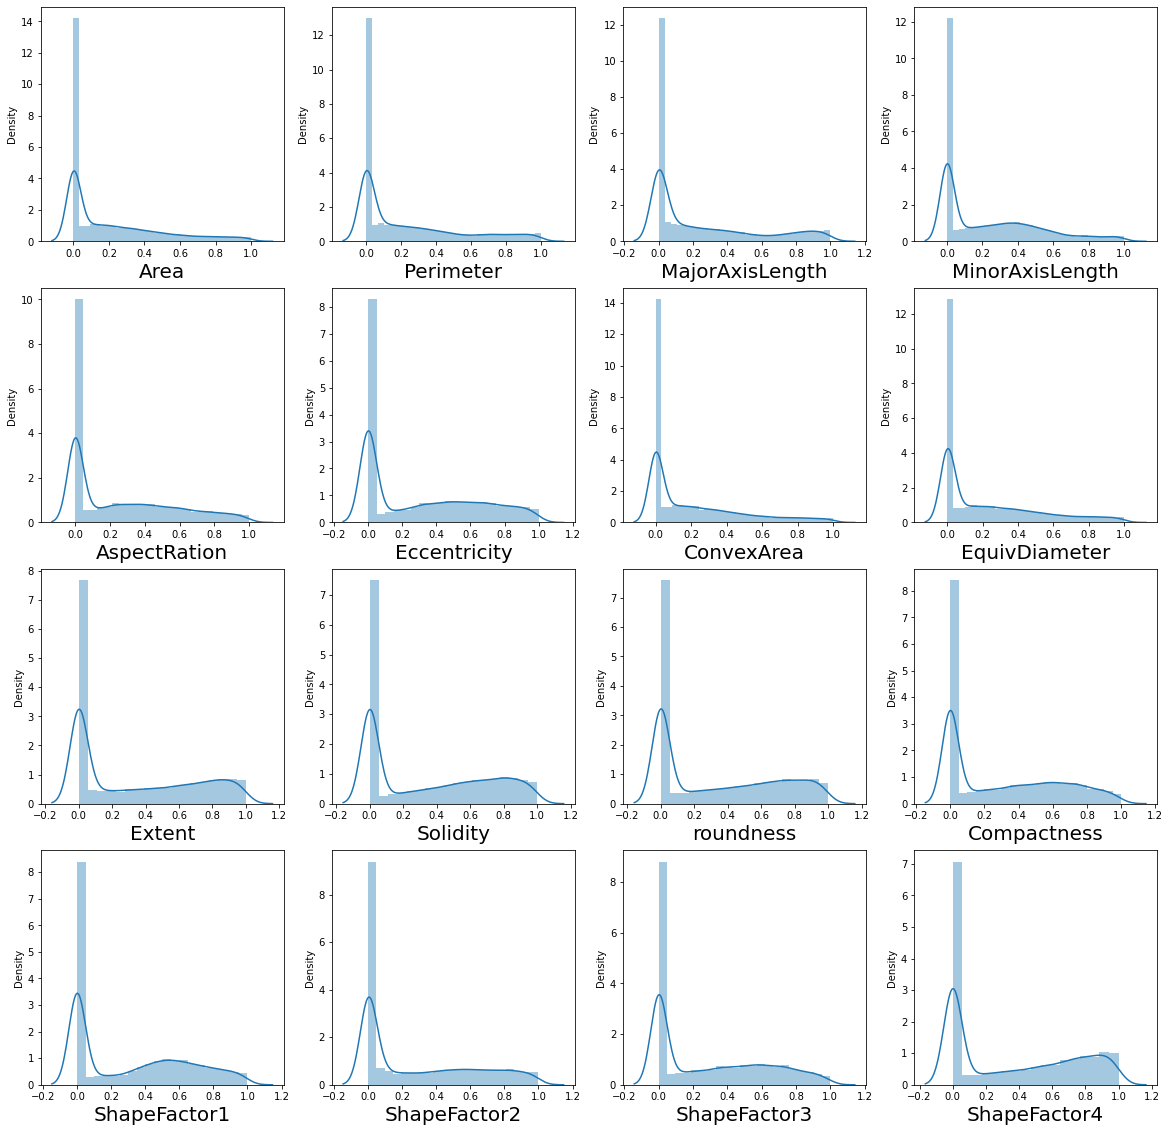

In [170]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
print(df_scaled.columns)
for column in df_scaled.columns:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_scaled[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()


In [173]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
data = trans.fit_transform(df_scaled)
df_SS = pd.DataFrame(data,columns=df_scaled.columns)

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

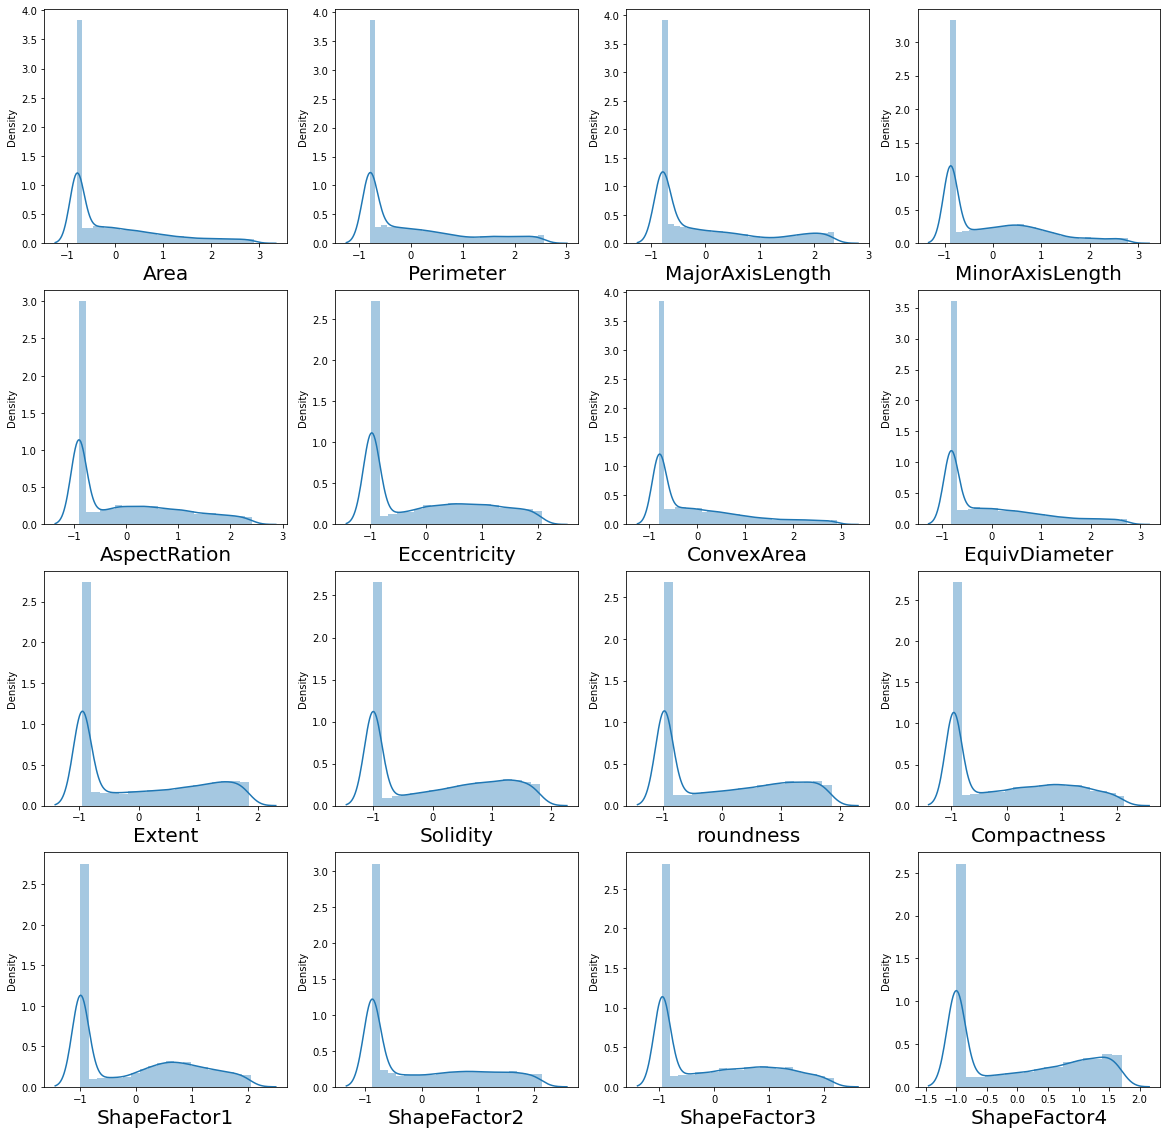

In [174]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df_SS.columns:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_SS[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()


In [200]:
df_outlier = df_corr.copy()

In [201]:
from scipy import stats
for column in df_outlier.columns:
    Q1= np.percentile(df_outlier[column], 30,interpolation = 'midpoint')
    Q3 = np.percentile(df_outlier[column], 70, interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    median = df_outlier[column].quantile(0.50)
    df_outlier[column] = np.where(df_outlier[column] <(Q1-1.5*IQR), median,df_outlier[column])
    df_outlier[column] = np.where(df_outlier[column] >(Q3+1.5*IQR), median,df_outlier[column])
    print(column, "->", df_outlier[column].skew())

Bean ID -> -0.0002688056940592967
Area -> 0.7354109665667812
Perimeter -> 0.5471892509181678
MajorAxisLength -> 0.4954557406797818
MinorAxisLength -> 0.3594131550865328
AspectRation -> 0.03745200058740623
Eccentricity -> -0.02722217404845892
ConvexArea -> 0.7441525802333171
EquivDiameter -> 0.5002839624731831
Extent -> -0.44935096514929473
Solidity -> -0.5177672962718265
roundness -> -0.331142801228161
Compactness -> -0.060984935650637756
ShapeFactor1 -> -0.05544079593154872
ShapeFactor2 -> 0.2826678544018903
ShapeFactor3 -> -0.07308890226396912
ShapeFactor4 -> -0.8789447155356671
Class -> 0.5012876910265892


In [202]:
from sklearn.preprocessing import StandardScaler
trans = StandardScaler()
data = trans.fit_transform(df_outlier)
df_temp = pd.DataFrame(data,columns=df_outlier.columns)

In [203]:
df_temp[(np.abs(stats.zscore(df_temp)) <= 4).all(axis=1)]

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-1.736835,-1.284298,-1.388406,-1.533077,-0.752189,-1.996396,-0.168559,-1.279200,-1.375895,0.203804,0.229580,1.502217,0.041023,0.815601,2.429583,0.092186,1.142007,0.350318
1,-1.736580,-1.260443,-1.208494,-1.648892,-0.382353,0.083253,-0.168559,-1.247751,-1.346402,0.702984,-1.314815,0.188294,0.041023,0.398003,-0.034041,0.092186,1.011626,0.350318
2,-1.736325,-1.214985,-1.298739,-1.462740,-0.666796,-1.922903,-0.168559,-1.212105,-1.290678,0.557184,0.510007,1.313852,0.041023,0.711932,2.261099,0.092186,1.294013,0.350318
3,-1.735816,-1.161505,-1.324538,-1.628870,-0.066905,0.083253,-0.168559,-1.162076,-1.225898,0.432294,1.042500,1.999146,0.041023,0.064668,-0.034041,0.092186,1.338392,0.350318
4,-1.735561,-1.151724,-1.228551,-1.466759,-0.433538,-2.149733,-0.168559,-1.149482,-1.214139,0.496802,0.490467,1.239864,0.041023,0.447007,2.438873,0.092186,1.369359,0.350318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13586,1.730812,-0.320113,-0.418960,-0.314243,-0.248132,0.090412,-0.161146,-0.330026,-0.297587,-1.025077,0.818239,0.735556,0.056719,0.255775,0.063335,0.107874,0.991603,-0.198837
13587,1.731067,-0.319832,-0.433216,-0.422369,-0.048765,-0.357362,-0.670355,-0.330990,-0.297300,1.100793,0.985992,0.835723,0.496706,0.054143,0.294749,0.553433,0.917611,-0.198837
13588,1.731322,-0.317158,-0.421394,-0.422921,-0.028912,-0.380005,-0.698812,-0.325829,-0.294578,-0.642624,0.645668,0.769257,0.507012,0.045981,0.298871,0.564004,0.272991,-0.198837
13589,1.731577,-0.316595,-0.392467,-0.395036,-0.067053,-0.281724,-0.577332,-0.319085,-0.294005,-1.253807,-0.186767,0.574601,0.393228,0.096224,0.237532,0.447638,-0.413137,-0.198837


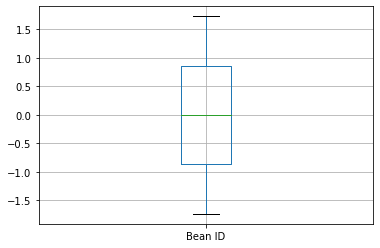

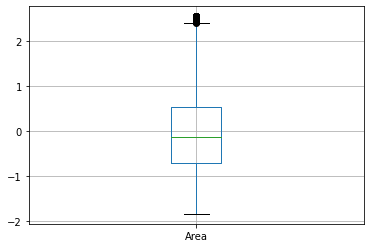

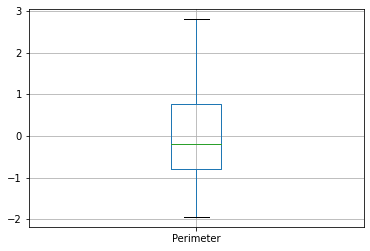

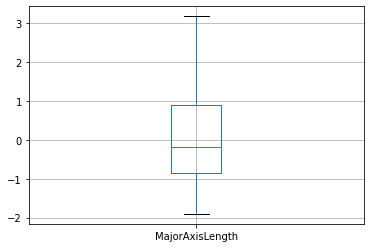

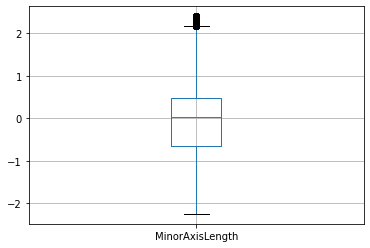

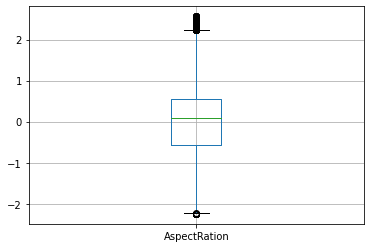

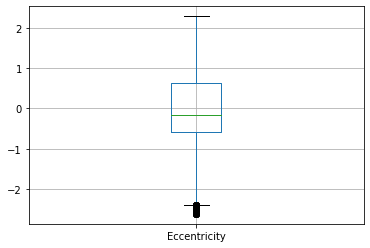

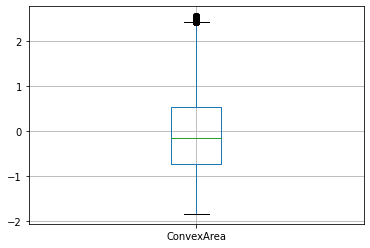

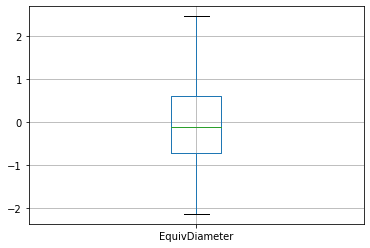

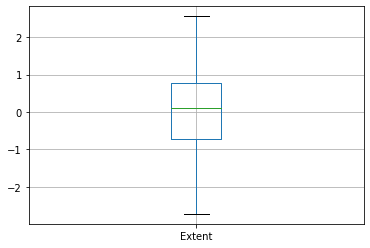

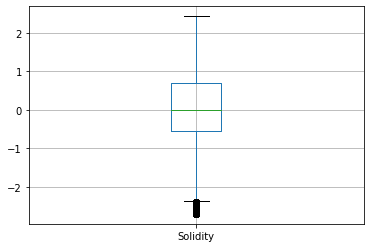

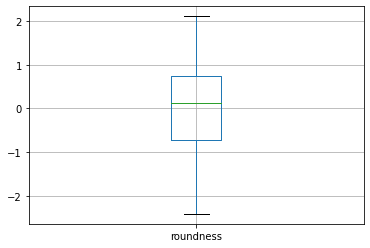

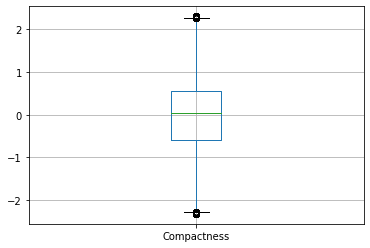

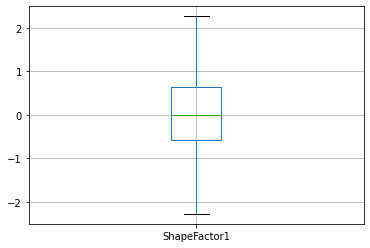

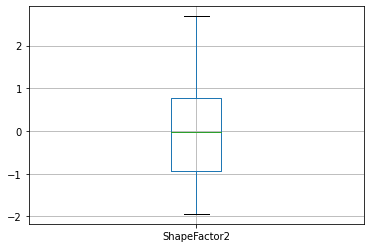

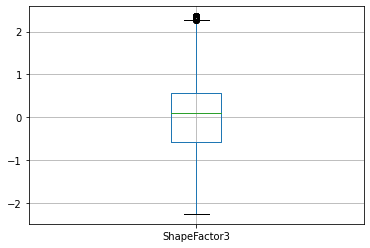

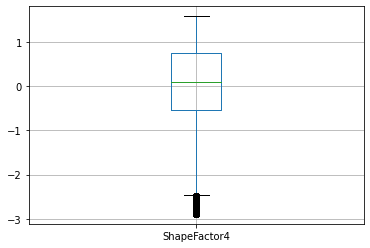

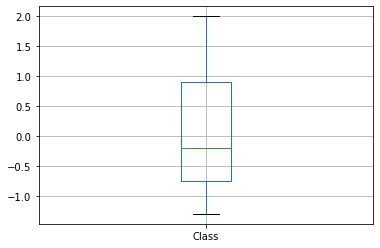

In [204]:
for column in df_temp:
    plt.figure()
    df_temp.boxplot([column])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

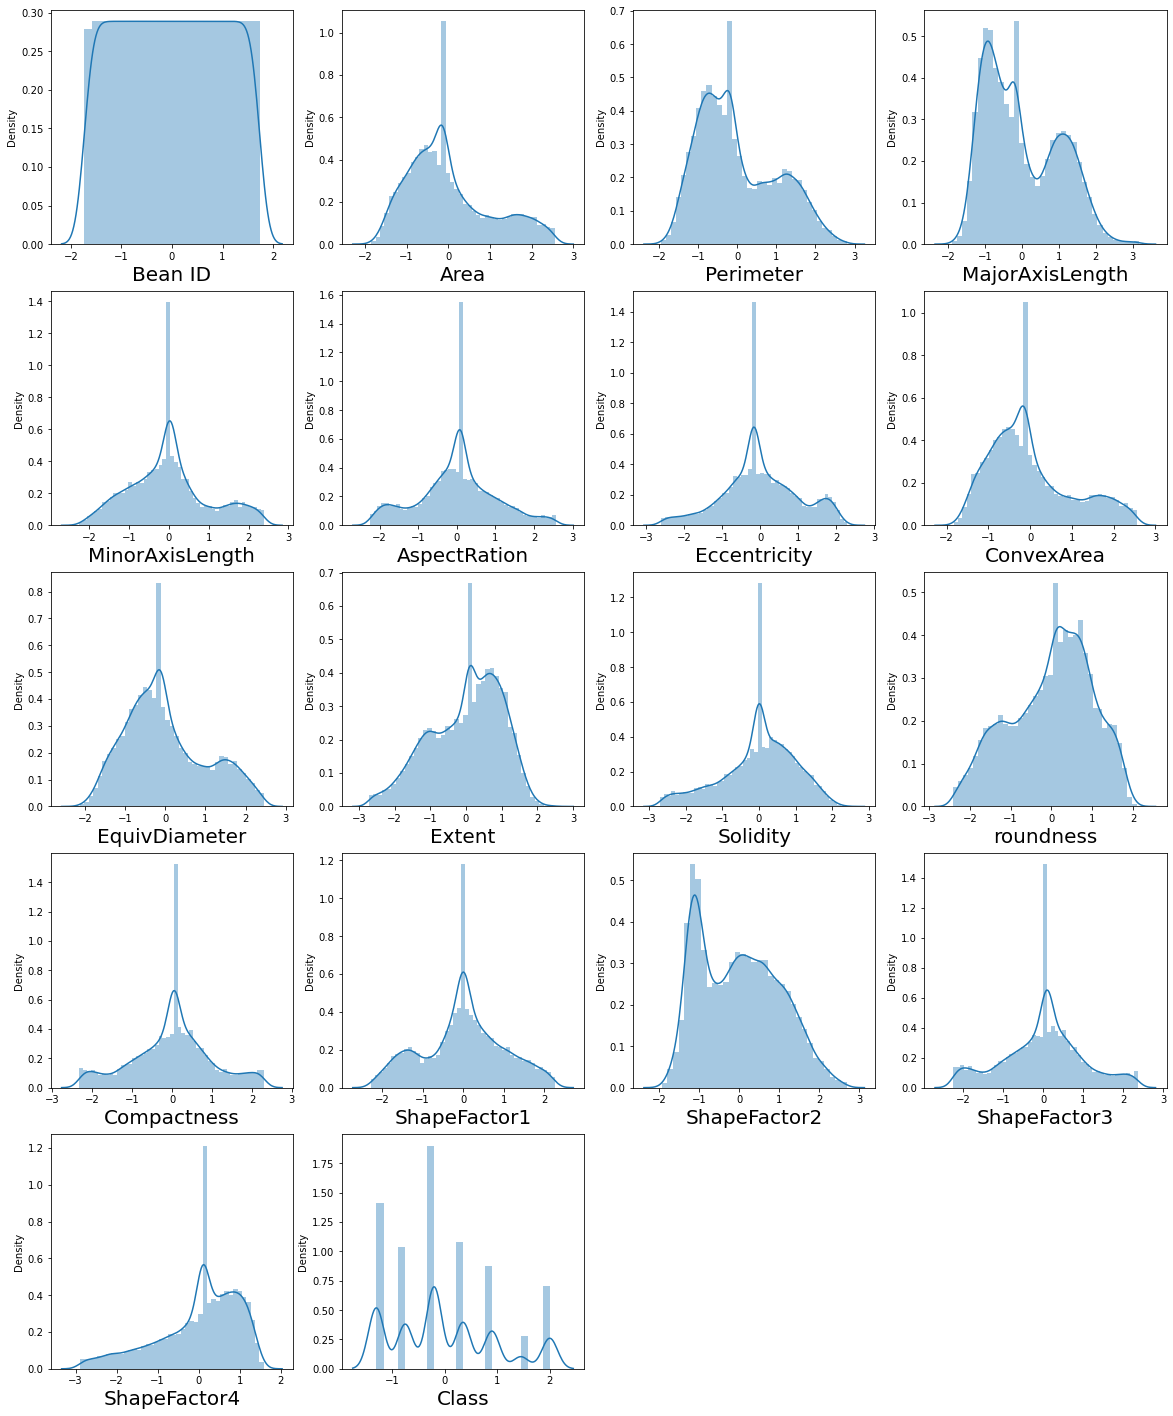

In [205]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df_temp.columns:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_temp[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [124]:
df_normalize = df_outlier.copy()
df_normalize.drop(columns= ["Class","Bean ID"],inplace=True)
df_normalize

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395.0,610.291,208.178117,173.888747,1.197191,0.764576,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734.0,638.018,200.524796,182.734419,1.097356,0.764576,29172.0,191.272751,0.783968,0.984986,0.887034,0.801138,0.006979,0.003564,0.641822,0.998430
2,29380.0,624.110,212.826130,175.931143,1.209713,0.764576,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
4,30140.0,620.134,201.847882,190.279279,1.060798,0.764576,30417.0,195.896503,0.773098,0.990893,0.984877,0.801138,0.006697,0.003665,0.641822,0.999166
5,30279.0,634.927,212.560556,181.510182,1.171067,0.764576,30600.0,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


####Outlier usiing Quantile

In [125]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
col = df_normalize.columns
dt = scaler.fit_transform(df_normalize)
df_scaled = pd.DataFrame(dt,columns=col)

In [126]:
df_scaled

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.102271,0.099359,0.065144,0.328288,0.157480,0.563658,0.100453,0.137983,0.591105,0.624829,0.885654,0.901975,0.635944,0.833049,0.927985,0.918037
1,0.106618,0.131559,0.044858,0.384810,0.066245,0.563658,0.106169,0.143387,0.671250,0.375399,0.637085,0.510198,0.571619,0.967315,0.506773,0.894182
2,0.114903,0.115407,0.077464,0.341338,0.168922,0.563658,0.112648,0.153596,0.647841,0.670120,0.850019,0.885973,0.619975,0.800942,0.909701,0.945848
3,0.124649,0.110790,0.048365,0.433021,0.032835,0.563658,0.121742,0.165465,0.627790,0.756122,0.979663,0.510198,0.520274,1.000000,0.506773,0.953968
4,0.126431,0.127970,0.076760,0.376988,0.133605,0.563658,0.124031,0.167619,0.638147,0.666964,0.836022,0.938172,0.579168,0.834819,0.969684,0.959634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13586,0.277985,0.272869,0.278633,0.405324,0.482390,0.564925,0.272977,0.335545,0.393805,0.719902,0.740617,0.512737,0.549711,0.382135,0.509326,0.890518
13587,0.278036,0.270318,0.259694,0.435794,0.412673,0.477863,0.272802,0.335597,0.735119,0.746995,0.759566,0.583912,0.518653,0.426233,0.581813,0.876981
13588,0.278524,0.272434,0.259597,0.438828,0.409147,0.472997,0.273740,0.336096,0.455209,0.692030,0.746992,0.585579,0.517395,0.427019,0.583533,0.759039
13589,0.278626,0.277611,0.264482,0.432999,0.424449,0.493767,0.274966,0.336201,0.357082,0.557587,0.710167,0.567172,0.525135,0.415330,0.564602,0.633504


Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

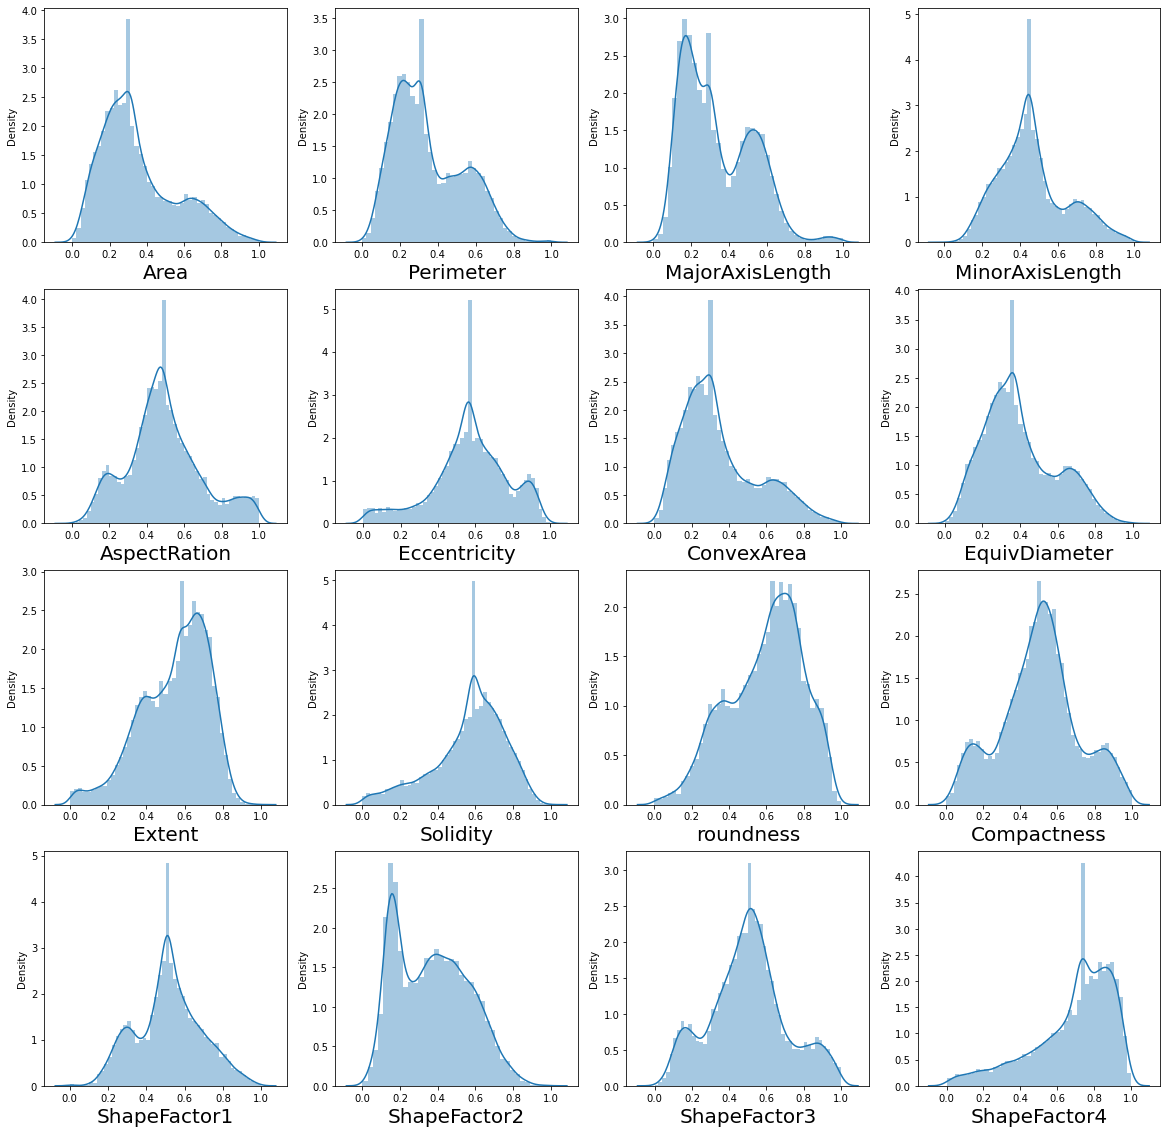

In [127]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
print(df_scaled.columns)
for column in df_scaled.columns:
    if plotnumber<=18 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df_scaled[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

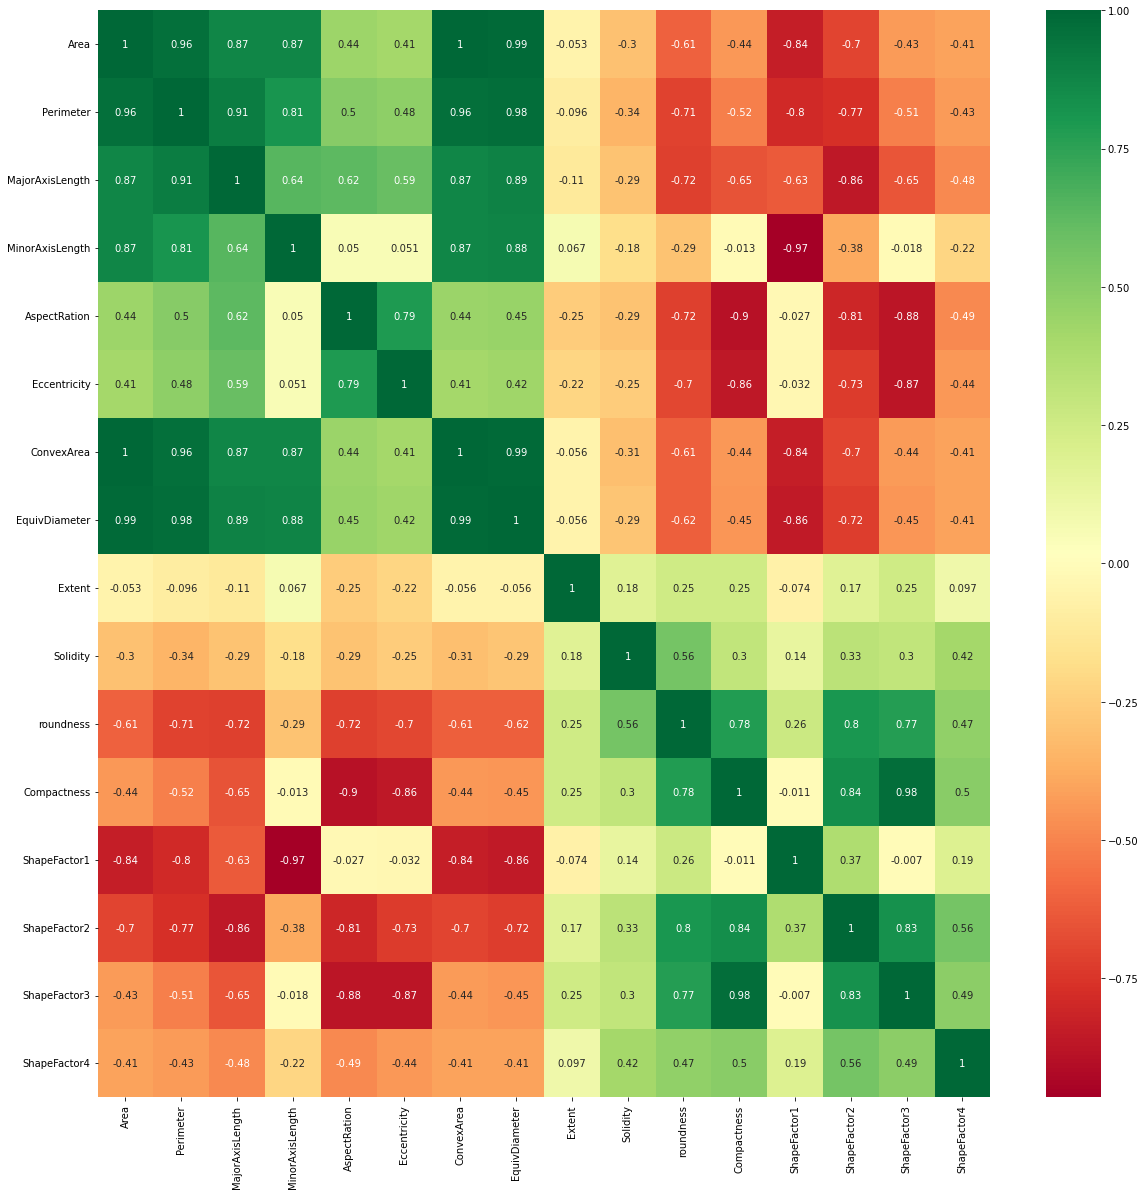

In [132]:

corrmat  = df_scaled.corr()
#Correlation plot
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df_scaled[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [133]:
vif_score(df_scaled)

,Features,VIF_Score
0,Area,987.129191
1,Perimeter,37.507568
2,MajorAxisLength,10.226324
3,MinorAxisLength,28.634145
4,AspectRation,5.676114
5,Eccentricity,4.415332
6,ConvexArea,1014.440900
7,EquivDiameter,105.643845
8,Extent,1.117034
9,Solidity,1.863884
